**Table of Contents**
- 
**1. Introduction**

-Overview of the Project

-Objectives of the Analysis

**2. Data Loading and Exploration**

-Loading the Dataset

-Initial Data Exploration

-Visualizations

-Summary Statistics

**3. Data Preprocessing**

-Text Cleaning and Tokenization

-CountVectorizer for Feature Extraction

-Scaling and Standardization

-Splitting Data into Training and Testing Sets

**4. Modeling: Logistic Regression**


-Building and Training the Logistic Regression Model

-Analyzing Model Performance (accuracy, precision, recall, F1 score)

-Top Positive and Negative Words

-Actionable Insights Based on Important Features

**5. Modeling: Decision Tree with PCA**

-Setting Up Pipeline with PCA and Decision Tree

-Grid Search for Hyperparameter Tuning

-Analyzing Cross-Validation and Test Scores

**6. Model Evaluation**

-Confusion Matrix Analysis

-ROC Curve and AUC Score

-Analyzing Precision, Recall, and F1 Score

**7. Conclusion and Recommendations**
-Summary of Findings

-Suggested Improvements

**Introduction**
- 
In this project, I will analyze hotel reviews and stay details to help understand what factors contribute to higher customer satisfaction. Starting with exploratory data analysis (EDA) to inspect and clean the data, we will prepare text and numerical features for modeling. We will then build two models— a logistic regression to identify key predictive words in reviews, and a decision tree classifier with PCA to optimize feature use. After comparing model performance, we’ll evaluate the best model in depth to provide actionable insights on factors that most impact hotel ratings.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import roc_curve, auc, RocCurveDisplay, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.utils import resample


- Importing libraries/packages

In [2]:
df = pd.read_csv('/Users/mychalortiz/Downloads/Brainstation/Deliverables/NLP With Hotel Review/Hotel_Reviews.csv')

- Reading in CSV

**Data Inspection/Cleaning**

In [3]:
df.head(5)

,Unnamed: 0,Additional_Number_of_Scoring,Average_Score,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,...,Reviewer_Nationality_USA,Reviewer_Nationality_Other,Hotel_Address_Amsterdam,Hotel_Address_Barcelona,Hotel_Address_London,Hotel_Address_Milan,Hotel_Address_Paris,Hotel_Address_Vienna,Leisure_Trip,Nights_Stayed
0,0,194,7.7,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,0,...,0,1,1,0,0,0,0,0,1,6
1,1,194,7.7,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,0,...,0,0,1,0,0,0,0,0,1,4
2,2,194,7.7,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,0,...,0,0,1,0,0,0,0,0,1,3
3,3,194,7.7,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,0,...,0,0,1,0,0,0,0,0,1,3
4,4,194,7.7,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,0,...,0,1,1,0,0,0,0,0,1,2


- Ensuring that the csv has been transfered to the dataframe

- The dataset consists of hotel reviews and stay data belonging to a hotel management company
- It has features such as client review's on their experiences (positive/negative), experience rating, postive/negative word counts, number of nights stayed, where the hotel was located, etc.
    - The Average_Score column represents the average rating of that hotel, not the average rating from the perspective of an individual reviewer

**Exploratory Data Analysis**
- 

In [4]:
df.drop(columns = 'Unnamed: 0', axis = 1, inplace = True)
#using drop function in order to remove unnecessary column

df.head(5)
#previewing dataframe to ensure that it has been dropped

,Additional_Number_of_Scoring,Average_Score,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Days_Since_Review,...,Reviewer_Nationality_USA,Reviewer_Nationality_Other,Hotel_Address_Amsterdam,Hotel_Address_Barcelona,Hotel_Address_London,Hotel_Address_Milan,Hotel_Address_Paris,Hotel_Address_Vienna,Leisure_Trip,Nights_Stayed
0,194,7.7,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,0,0,...,0,1,1,0,0,0,0,0,1,6
1,194,7.7,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,0,0,...,0,0,1,0,0,0,0,0,1,4
2,194,7.7,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,0,3,...,0,0,1,0,0,0,0,0,1,3
3,194,7.7,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,0,3,...,0,0,1,0,0,0,0,0,1,3
4,194,7.7,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,0,10,...,0,1,1,0,0,0,0,0,1,2


- Dropping unnecessary column 'Unnamed: 0'
    - Likely created in the data transfer process

In [5]:
df.shape

(515738, 29)

- The data set has 515,738 rows and 30 columns

In [6]:
df.isnull().sum()
#Checking for nulls

Additional_Number_of_Scoring                  0
Average_Score                                 0
Negative_Review                               0
Review_Total_Negative_Word_Counts             0
Total_Number_of_Reviews                       0
Positive_Review                               0
Review_Total_Positive_Word_Counts             0
Total_Number_of_Reviews_Reviewer_Has_Given    0
Reviewer_Score                                0
Days_Since_Review                             0
Latitude                                      0
Longitude                                     0
Day                                           0
Month                                         0
Year                                          0
Reviewer_Nationality_Australia                0
Reviewer_Nationality_Ireland                  0
Reviewer_Nationality_UAE                      0
Reviewer_Nationality_UK                       0
Reviewer_Nationality_USA                      0
Reviewer_Nationality_Other              

In [7]:
df.duplicated().sum()

539

- After checking for nulls and duplicates, I have found that there are none in the dataset

***Data Dictionary***

- Additional_Number_of_Scoring: Number of additional scoring reviews
- Average_score: Average score for each hotel
- Negative_Review: Negative feedback given by the reviewer
- Review_Total_Negative_Word_Counts: Total word count of negative review
- Total_Number_of_Reviews: Total number of reviews for each hotel
- Positve_Review: Feedback given by the reviewer
- Review_Total_Positive_Word_Counts: Count of positve words in review
- Total_Number_of_Reviews_Reviewer_Has_Given: Total number of reviews given by the reviewer
- Reveiwer_Score: Score given by reviewer
- Days_Since_Review: Total number of days since review
- Latitude: Latitude of hotel
- Longitute: Longitude of hotel
- Day: Day review was given
- Month: Month review was given
- Year: Year review was given
- Reviewer Nationality: Binary columns indicating the nationality of the reviewer
- Hotel Address: Binary columns indicating the location of the hotel
- Leisure_Trip: Binary column indicated if the trip was a leisure trip
- Nights_Stayed: number of nights stayed

**Visualizations**

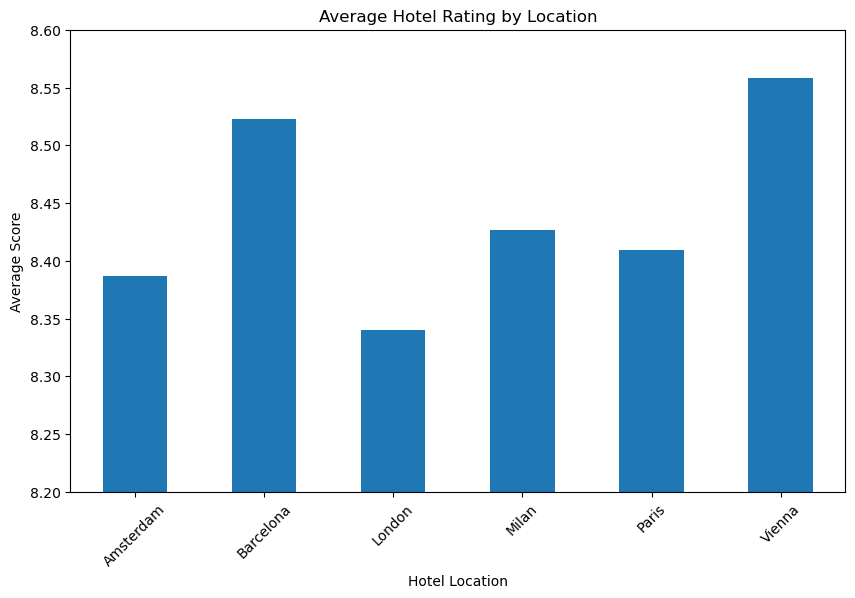

In [8]:
melted_df_avg_score = df.melt(
    id_vars='Average_Score', 
    value_vars=['Hotel_Address_Amsterdam', 'Hotel_Address_Barcelona', 
                'Hotel_Address_London', 'Hotel_Address_Milan', 
                'Hotel_Address_Paris', 'Hotel_Address_Vienna'],
    var_name='Hotel_Location', 
    value_name='Indicator'
)
#reshaping the DataFrame, with 'Average_Score' as the identifier, each hotel location as 'Hotel_Location', and their values in 'Indicator'

melted_df_avg_score = melted_df_avg_score[melted_df_avg_score['Indicator'] == 1]
#filtering the rows where the address location is 1

melted_df_avg_score['Hotel_Location'] = melted_df_avg_score['Hotel_Location'].str.replace('Hotel_Address_', '')
#removing text so that it only contain only the city/country name

avg_scores_by_location = melted_df_avg_score.groupby('Hotel_Location')['Average_Score'].mean()
#grouping by 'Hotel_Location' and calculate the mean of 'Average_Score'

plt.figure(figsize=(10, 6))
avg_scores_by_location.plot(kind='bar')
plt.xlabel('Hotel Location')
plt.ylabel('Average Score')
plt.title('Average Hotel Rating by Location')
plt.ylim(8.2, 8.6)  
#setting y-axis limit to (8.2-8.6) for better visualization
plt.xticks(rotation=45)
plt.show()

- Plotting the average rating for each location
    - Vienna has the highest rating at ~8.55
    - Barcelona is second at slightly greater than 8.5  
    - Amsterdam and London are the two lowest, with each being less than 8.4

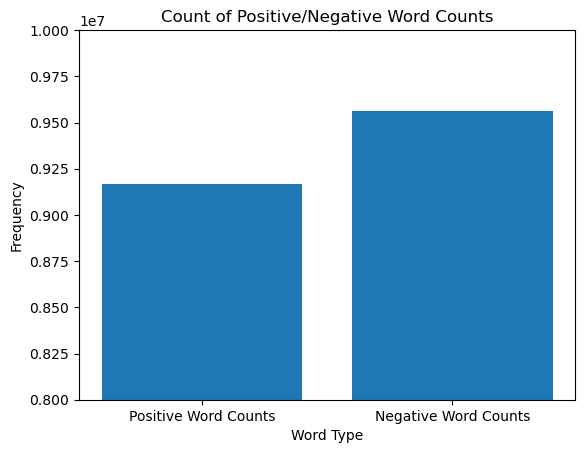

In [9]:
positiveCounts = df['Review_Total_Positive_Word_Counts'].sum()
negativeCounts = df['Review_Total_Negative_Word_Counts'].sum()
#calculating sum of positive/negative words

totalWords = [positiveCounts, negativeCounts]
labels = ['Positive Word Counts', 'Negative Word Counts']

plt.figure()
plt.bar(labels, totalWords)
plt.title('Count of Positive/Negative Word Counts')
plt.xlabel('Word Type')
plt.ylabel('Frequency')
plt.ylim(8000000, 10000000)  
plt.show()
#plotting

- Plotting count of positive/negative word counts
- Higher count of negative word counts
    - This suggests that reviewers might tend to be more verbose or detailed when describing negative experiences
    - Which may indicate an overall sentiment among reviewers, however it’s more common for people to leave detailed feedback when they experience something that doesn't meet their expectations, as opposed to a positive experience, which might explain the higher negative word count 

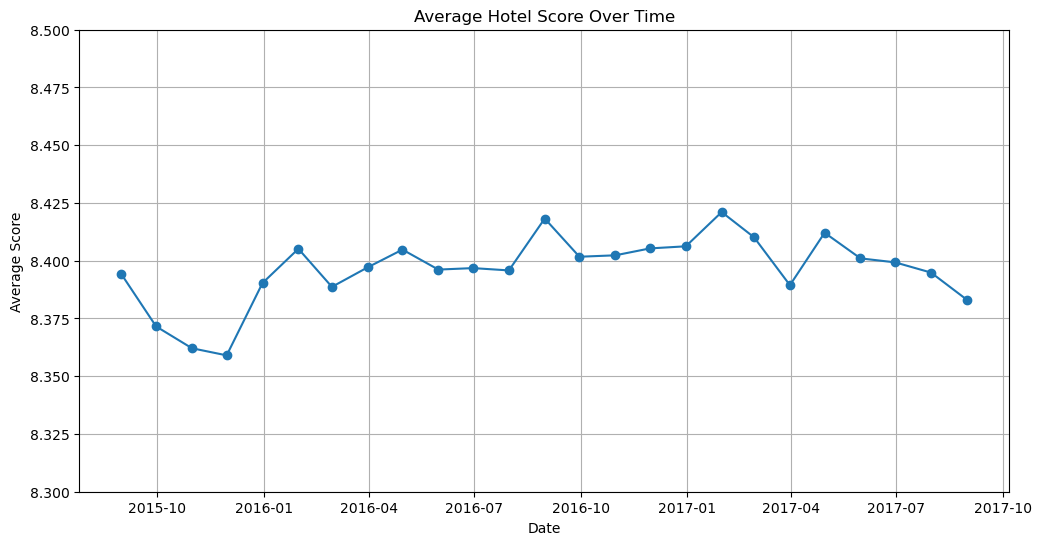

In [10]:
df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day']])
#converting 'Date' column to datetime

df.set_index('Date', inplace=True)
#setting the Date column as the index (optional but useful for time series data)

average_score_over_time = df['Average_Score'].resample('M').mean()
#resampling by month in order to get the average for each month

plt.figure(figsize=(12, 6))
plt.plot(average_score_over_time,  marker='o')
plt.title('Average Hotel Score Over Time')
plt.xlabel('Date')
plt.ylabel('Average Score')
plt.ylim(8.3, 8.5)
#setting y-axis limit for better vizualisation
plt.grid(True)

- Plotting average hotel score over time (by month)
- We can see that the average score remains mostly stable over time, with only slight fluctuations
- There may be a seasonality component to it, as there seems to be a slight change in customer satisfaction during holiday/busier seasons

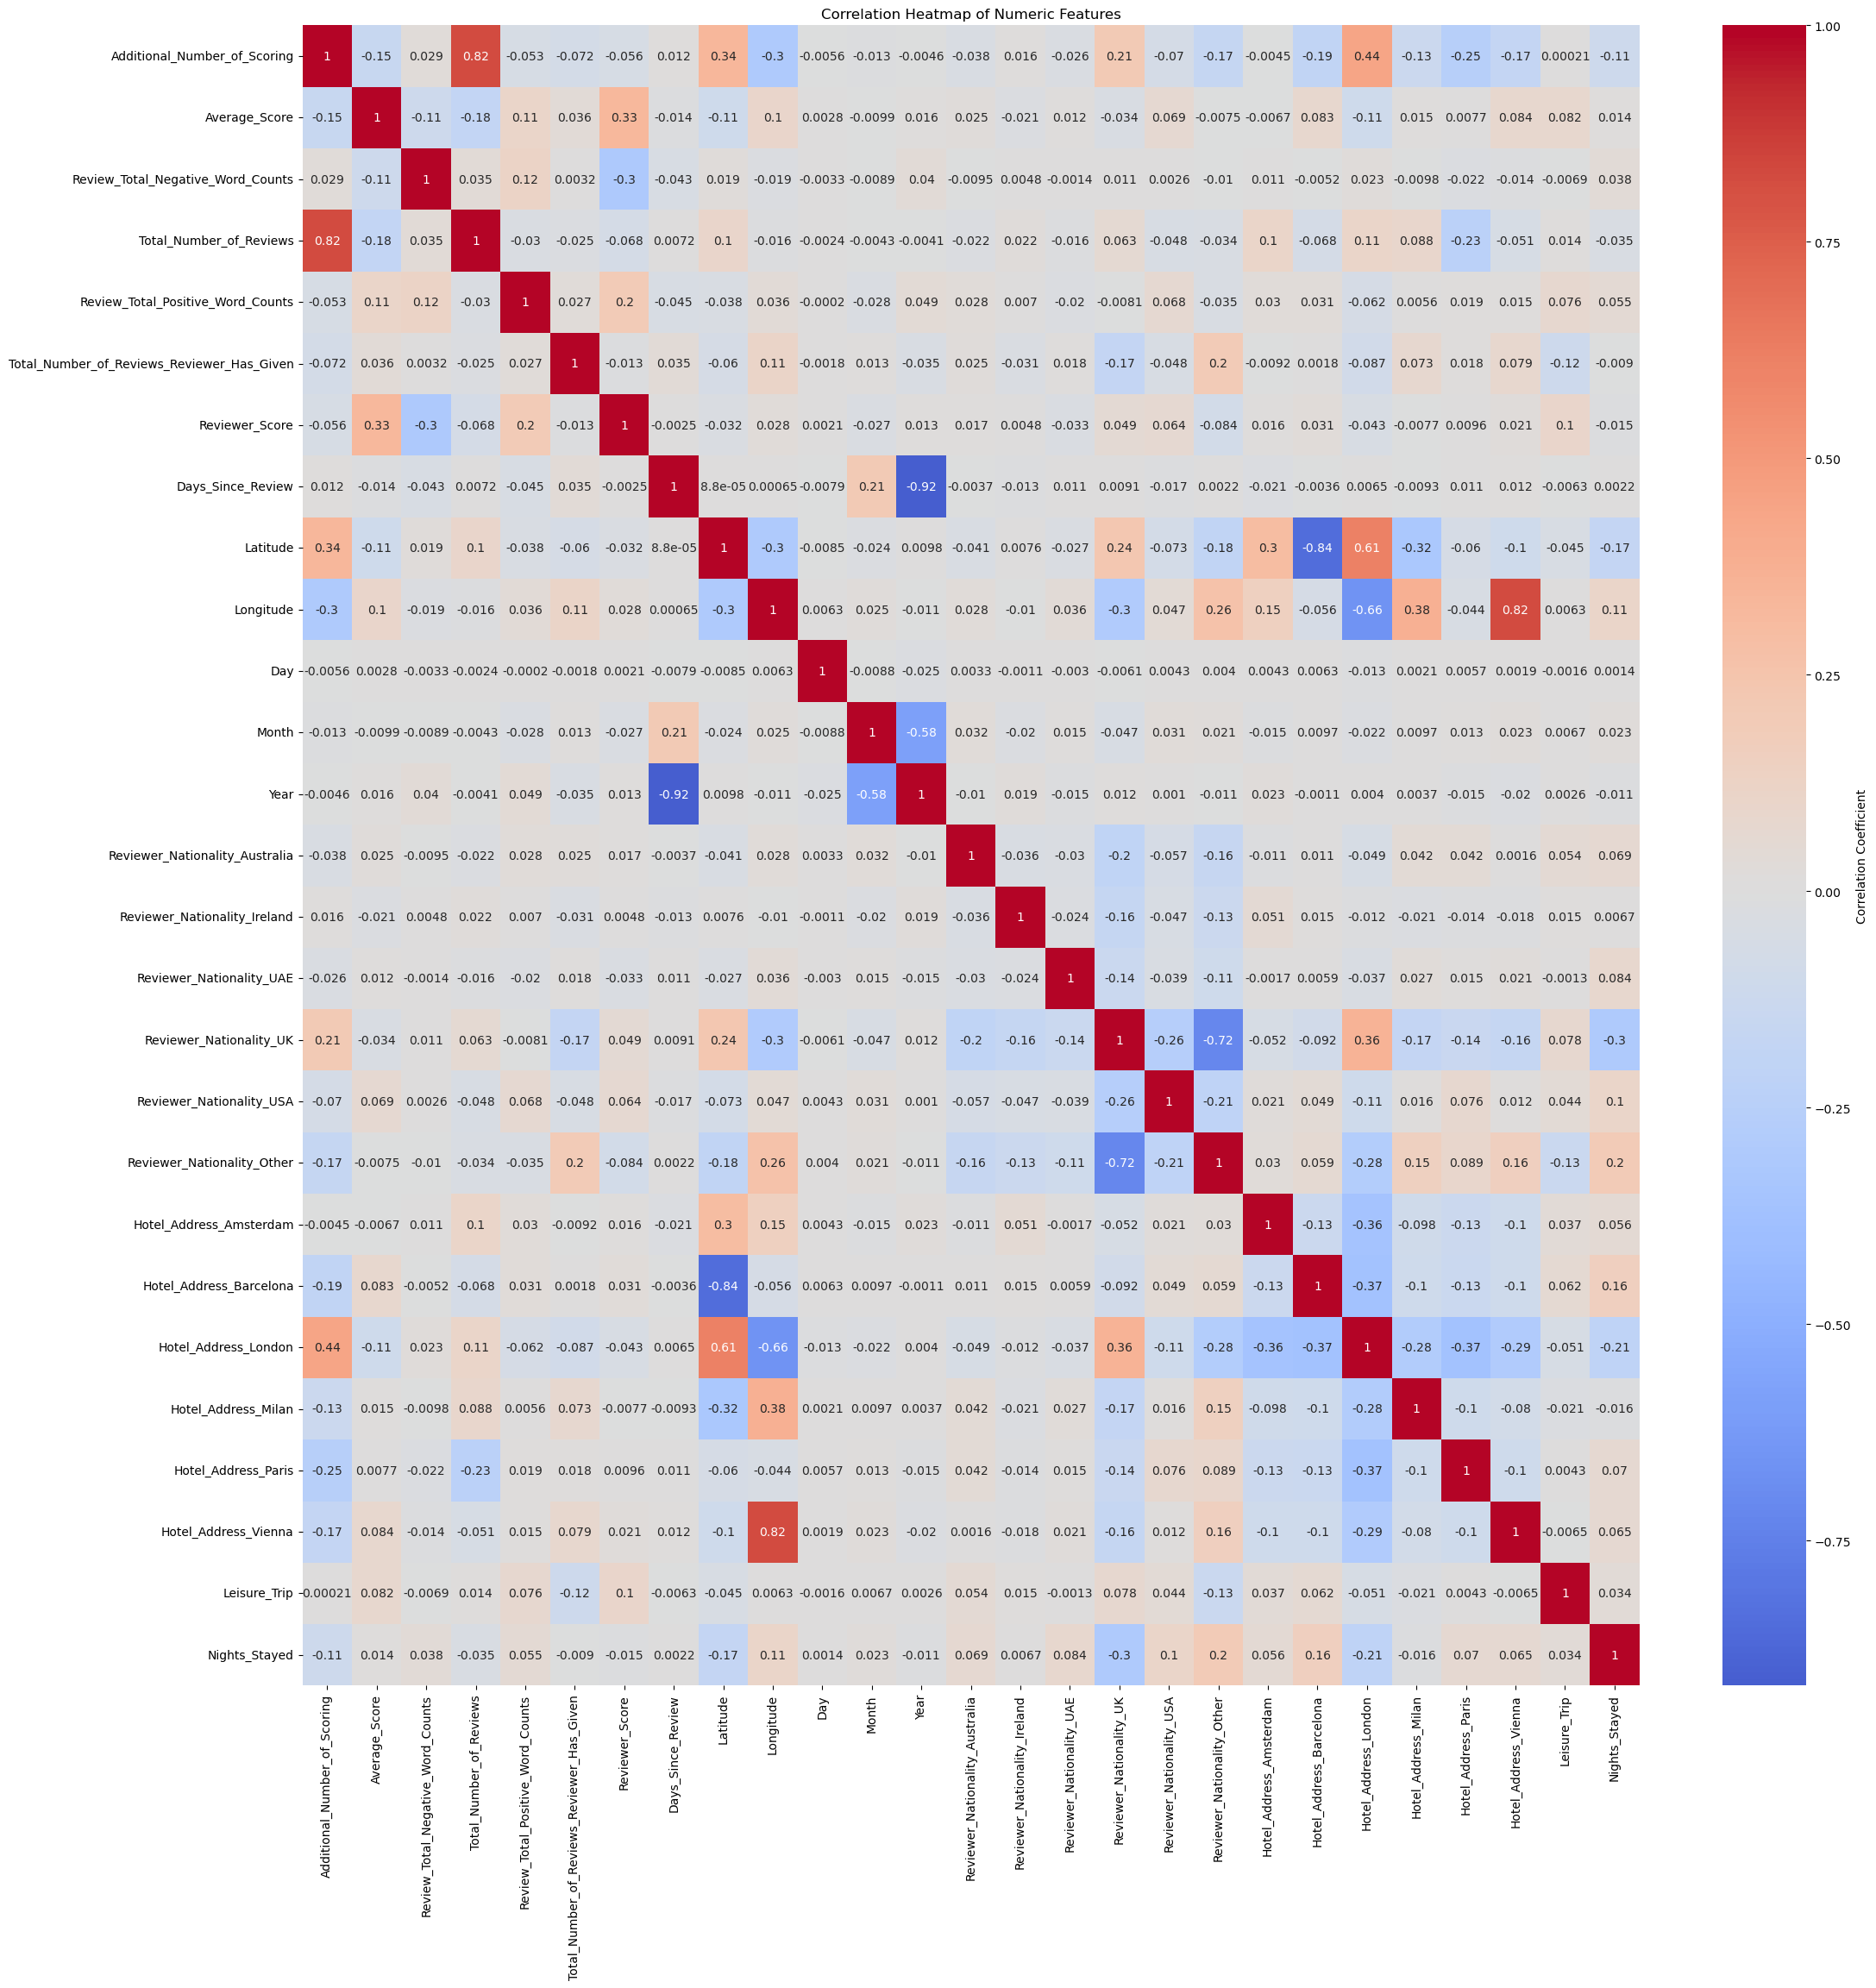

In [11]:
dfNum = df.select_dtypes(include=['number'])
#creating dataframe with numeric data from the original dataframe

correlation_matrix = dfNum.corr()
#getting the correlation matrix

plt.figure(figsize=(25, 25))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", center=0, cbar_kws={'label': 'Correlation Coefficient'})
plt.title("Correlation Heatmap of Numeric Features")
plt.show()
#plotting heatmap

- Plotting a heatmap of the correlation matrix
    - Pardon the size, it was very difficult to read when smaller due to the number of features
- Location Correlations
    - Latitude and Hotel_Address_Barcelona, as well as Longitude and Hotel_Address_Lisbon, are highly correlated
- Nationality Features
    - Strong negative correlations between nationality indicators
- Time Features
    - Year, Month, and Day are moderately correlated, reflecting natural chronological order

In [12]:
print(df['Reviewer_Score'].describe())

count    515738.000000
mean          0.570006
std           0.495075
min           0.000000
25%           0.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: Reviewer_Score, dtype: float64


- Slight Imbalance: 57% of reviews are positive, and 43% are negative.
    - Think about using class weighting

**Preprocessing**
- 

In [13]:
import re
from nltk.tokenize import word_tokenize
#importing libraries/packages to help with tokenizing

train_df, test_df = train_test_split(df, test_size=0.2, random_state=14)
#splitting data into train and test sets

def tokenizer(text):
    text = text.lower()
    #making text lowercase

    tokens = re.findall(r"\b\w+\b(?:'\w+)?", text)
    #using regex to keep contractions as single tokens
    #in the first iteration the tokenizer was splitting up contractions such as "didn't"

    tokens = [word for word in tokens if word.isalpha() or "'" in word]
    #keeping only alphabetic words
    
    return tokens
#creating function to tokenize reviews

pos_vectorizer = CountVectorizer(max_features=500, min_df=10, stop_words='english', tokenizer=tokenizer)  
    #vectorizing Positive_Review     
    #limiting to 500 features    
    #excluding tokens with <10 occurrences      
    #removing stopwords
    #using custom tokenizer for text processing

neg_vectorizer = CountVectorizer(max_features=500, min_df=10, stop_words='english', tokenizer=tokenizer) 
    #vectorizing Negative_Review with the same settings

- Transforming the positive and negative review columns using a CountVectorizer and splitting the data into train and test sets
- Tokenizer and text cleaning steps:
    - Converted all text to lowercase
    - Used a custom tokenizer to split the text into tokens and filter out non-alphabetic tokens
    - Removed stop words
    - Used regex to keep contractions as single tokens
- Vectorizer Steps:
    - Limited the vocabulary to 500 features (most frequent tokens)
    - Excluded tokens that appear in fewer than 10 documents

In [14]:
X_train_pos = pos_vectorizer.fit_transform(train_df['Positive_Review'])
X_test_pos = pos_vectorizer.transform(test_df['Positive_Review'])
X_train_neg = neg_vectorizer.fit_transform(train_df['Negative_Review'])
X_test_neg = neg_vectorizer.transform(test_df['Negative_Review'])
#fitting and transforming both the positive and negative reviews in the training set, then the test set

/opt/anaconda3/envs/ml_env/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


- Vectorizing the positive and negatative reviews separately
    - This makes it so that each vectorizer can get vocabulary unique to positive/negative sentiments
    - 'fit_transform' creates the tokens and transforms the text data into numerical form

In [15]:
X_train_pos_df = pd.DataFrame(X_train_pos.toarray(), columns=['pos_' + col for col in pos_vectorizer.get_feature_names_out()])
X_test_pos_df = pd.DataFrame(X_test_pos.toarray(), columns=['pos_' + col for col in pos_vectorizer.get_feature_names_out()])
X_train_neg_df = pd.DataFrame(X_train_neg.toarray(), columns=['neg_' + col for col in neg_vectorizer.get_feature_names_out()])
X_test_neg_df = pd.DataFrame(X_test_neg.toarray(), columns=['neg_' + col for col in neg_vectorizer.get_feature_names_out()])
#converting sparse matrices to DataFrames in order to merge

- Converting the sparse matrices (X_train_pos, X_test_pos, X_train_neg, X_test_neg) into dataframes
    - This makes the data easier to work with
- Adding prefix to column names
    - This prefix helps distinguish between features derived from positive and negative reviews
- 'get_feature_names_out' retrieves the tokens from the vectorizer, which are used as column names in the dataframes

In [16]:
train_numeric = train_df.select_dtypes(include=['number']).reset_index(drop=True)
test_numeric = test_df.select_dtypes(include=['number']).reset_index(drop=True)
#getting numeric features from the original datagrame

- Getting the numeric features from the orignal dataframe

In [17]:
X_train = pd.concat([train_numeric, X_train_pos_df, X_train_neg_df], axis=1)
X_test = pd.concat([test_numeric, X_test_pos_df, X_test_neg_df], axis=1)
#merging the vectorized text data and numeric data

- Concatenating the vectorized data and numeric data

In [18]:
scaler = StandardScaler()
X_train[train_numeric.columns] = scaler.fit_transform(X_train[train_numeric.columns])
X_test[test_numeric.columns] = scaler.transform(X_test[test_numeric.columns])
#standardizing the numeric variables

- Standardizing the dataset using Standard Scaler
    - Helps balance the influence of each feature in the dataset, which will lead to more stable and effective model performance

In [19]:
y_train = train_df['Reviewer_Score']
y_test = test_df['Reviewer_Score']
#creating y_train and y_test

- Setting the target variable to 'Reviewer_Score'

In [20]:
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print("y_train shape:", y_train.shape)
print('y_test shape:', y_test.shape)

X_train shape: (412590, 1027)
X_test shape: (103148, 1027)
y_train shape: (412590,)
y_test shape: (103148,)


- Checking the shapes of the train and test sets

In [21]:
y_train.value_counts()

Reviewer_Score
1    235282
0    177308
Name: count, dtype: int64

- Checking for class imbalance
- There is a bit of a class imbalance (1 - 235,282 values, 0 - 177,308 values)

In [22]:
X_train.drop(['Reviewer_Score'], axis=1, inplace=True)
X_test.drop(['Reviewer_Score'], axis=1, inplace=True)
#dropping 'Reviewer_Score'

X_train.head(5)
#ensuring it has been dropped

,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Days_Since_Review,Latitude,Longitude,Day,...,neg_windows,neg_work,neg_worked,neg_working,neg_works,neg_worn,neg_worst,neg_worth,neg_wouldn,neg_wrong
0,0.760468,0.735287,-0.623701,0.010056,0.421797,-0.559464,-1.383526,0.599642,-0.615519,1.615985,...,0,0,0,0,0,0,0,0,0,0
1,1.943066,1.282808,-0.623701,0.887718,0.971041,-0.468507,0.526386,0.605274,-0.638864,1.164803,...,0,0,0,0,0,0,0,0,0,0
2,-0.394164,0.735287,0.251145,-0.722191,-0.218988,-0.195634,-1.618077,0.588258,-0.658122,0.262439,...,0,0,0,0,0,0,0,0,0,0
3,-0.713785,1.465315,-0.623701,-0.837832,-0.218988,-0.104677,-1.388313,0.847273,0.429815,1.728780,...,0,0,0,0,0,0,0,0,0,0
4,0.410882,0.735287,0.251145,-0.055099,0.376027,-0.377549,-1.177696,0.603243,-0.639419,0.149644,...,0,0,0,0,0,0,0,0,0,0


- Removing unnecesary 'Reviewer_Score' column in 'X_train' and 'X_test' since it is the target variable

**Modelling**
- 

**Logistic Regression Model**

In [75]:
log_reg = LogisticRegression(solver='liblinear', C=0.5, class_weight='balanced') 
log_reg.fit(X_train, y_train)
#fitting logreg model

train_accuracy = log_reg.score(X_train, y_train)
test_accuracy = log_reg.score(X_test, y_test)
print(f'Train Accuracy: {train_accuracy}')
print(f'Test Accuracy: {test_accuracy}')

Train Accuracy: 0.7878087205215831
Test Accuracy: 0.7837960988094776


- Building linear regression model
- Test accuracy and train accuracy of 78.78% and 78.40%, indicate that the model is not overfitting
- Balancing classes to help since there’s a moderate class imbalance within 'Reviewer_score'
    - Doing this to ensure the model doesn’t overly favor the majority class
- Set 'C' 0.5 to regularize


In [60]:
y_prob = log_reg.predict_proba(X_test)[:, 1]
#getting the predicted probabilities for positives on the test set

thresholds = [0.3, 0.5, 0.7]  
#choosing thresholds

for threshold in thresholds:
    y_pred = (y_prob >= threshold).astype(int)
    #applying the threshold
    accuracy = accuracy_score(y_test, y_pred)
    #calculating accuracy
    print(f'Accuracy with threshold {threshold}: {accuracy:.2f}')
#using for loop to loop through thresholds and get the accuracy for each

Accuracy with threshold 0.3: 0.77
Accuracy with threshold 0.5: 0.78
Accuracy with threshold 0.7: 0.73


- Playing with thresholds to optimize
    - Changing thresholds customizes the model's behavior, specifically how it decided to classify
- It seems that 0.5 (the default), was the optimal threshold out of the options experimented with

In [61]:
from sklearn.metrics import precision_score, recall_score, f1_score

y_pred = log_reg.predict(X_test)
#predicting values on the test set

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
#calculating precision, recall, and F1 score for the test set

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Precision: 0.82
Recall: 0.79
F1 Score: 0.81


- Precision
    - 82% of positive predictions are correctly identified
    - Missed 18% of negative cases
- Recall
    - 79% of actual positives are correctly identified
    - Missed 21% of positive cases
- F1 Score
    - The F1 score combines precision and recall into a single metric
    - .81 indicates that the model is well rounded
- These metrics show a good balance of precision and recall, as indicated by the F1 score

In [62]:
coef = log_reg.coef_.flatten()
#getting the coefficients and storing it

feature_names = list(X_train.columns)
#getting a list of feature names and storing it

pos_features = [feature for feature in feature_names if feature.startswith('pos_')]
neg_features = [feature for feature in feature_names if feature.startswith('neg_')]
#storing features in two lists, one for the postive and another for negative words
#doing this by checking if the feature starts with one of the prefixes

pos_indices = [feature_names.index(feature) for feature in pos_features]
neg_indices = [feature_names.index(feature) for feature in neg_features]
#getting the indices of the positive/negative features

pos_coefs = coef[pos_indices]
neg_coefs = coef[neg_indices]
#storing coefficients for positive/negative review words

top_pos_words = [pos_features[i] for i in np.argsort(pos_coefs)[-20:]]
#selecting the highest coefficients for positve words
top_neg_words = [neg_features[i] for i in np.argsort(neg_coefs)[:20]]  
#selecting the lowest coefficients for negative

print(f'Top 20 Positive Words from Positive Reviews: {top_pos_words}')
print(f'Top 20 Negative Words from Negative Reviews: {top_neg_words}')

Top 20 Positive Words from Positive Reviews: ['pos_gorgeous', 'pos_fab', 'pos_exceptionally', 'pos_superb', 'pos_spotless', 'pos_home', 'pos_stunning', 'pos_brilliant', 'pos_perfect', 'pos_highly', 'pos_wonderful', 'pos_incredible', 'pos_trouble', 'pos_fantastic', 'pos_exceptional', 'pos_luxurious', 'pos_class', 'pos_amazing', 'pos_fabulous', 'pos_outstanding']
Top 20 Negative Words from Negative Reviews: ['neg_cleanliness', 'neg_dirty', 'neg_awful', 'neg_dated', 'neg_stars', 'neg_worst', 'neg_terrible', 'neg_rude', 'neg_tired', 'neg_overpriced', 'neg_horrible', 'neg_star', 'neg_priced', 'neg_broken', 'neg_tiny', 'neg_uncomfortable', 'neg_poor', 'neg_basic', 'neg_worn', 'neg_pictures']


- Getting the top 20 most correlated positive and negative words
    - Did this by splitting the data into two lists, getting their indices/coefficients, and sorting by the words with the highest coefficients
    - 'np.argsort(coefs)[-20:]' slices the last 20 indices from the list, which corresponds to the highest correlated words
    - 'np.argsort(coefs)[20:]' slices the top 20 most negatively correlated words, the words with the strongest negative association
- Top 20 highest correlated positive words:
    - 'gorgeous', 'fab', 'exceptionally', 'superb', 'spotless', 'home', 'stunning', 'brilliant', 'perfect', 'highly', 'wonderful', 'incredible', 'trouble', 'fantastic', 'exceptional', 'luxurious', 'class', 'amazing', 'fabulous', 'outstanding'
- Top 20 highest correlated negative words:
    - 'cleanliness', 'dirty', 'awful', 'dated', 'stars', 'worst', 'terrible', 'rude', 'tired', 'overpriced', 'horrible', 'star', 'priced', 'broken', 'tiny', 'uncomfortable', 'poor', 'basic', 'worn', 'pictures'

**Insights**
- Positive sentiments
    - Continue focus on cleanliness
         - Words such as 'spotless' indicate that management is doing a good job in this regard which is leading to increased guest satisfaction
    - Continue focus on staff service 
        - Words like 'superb', 'wonderful', and 'fantastic' suggest that the service provided by the staff is well-received, which enhances overall guest satisfaction
    - Focus on making guests' experiences' luxurious
        - Words like 'luxurious', 'exceptional', and 'class' indicate that guests highly value a sense of luxury and quality, suggesting that keeping high standars leads to satisfaction among guests
- Negative sentiments
    - Focus on rooms
        - Words such as 'uncomfortable', 'tiny', and 'basic' seem to indicate dissatisfaction with the rooms
        - Allocate resources towards increasing the quality of rooms
    - Focus more on staff service
        - The word 'rude' seems to indicate dissatisfaction with the rooms
        - Potentially increase staff training to improve overall staff service
    - Focus on cleanliness
        - Words like 'dirty' and 'dated' highlight complaints about cleanliness and the general condition of the hotels

**PCA with Decision Tree Classifier**
- 

In [63]:
sampleSize = int((len(X_train) * 0.3))
#getting sample size of 30%
#converint to integer because it was resulting in a float, which did not work when taking the actual sample

X_train_sample = X_train.sample(n = sampleSize, random_state = 1)
y_train_sample = y_train.sample(n = sampleSize, random_state = 1)
#creating new dataframes with samples of X_train and y_train

- Taking a smaller sample of the training data
    - Doing this before optimizing parameters because it reduces the computational load
    - Also to increase overall effiency

In [64]:
print(f'X_train shape: {X_train.shape}')
print(f'X_train sample shape: {X_train_sample.shape}')

X_train shape: (412590, 1026)
X_train sample shape: (123777, 1026)


- Ensuring that the data has been sampled correctly

In [65]:
pipe = Pipeline([
    ('reduce_dim', PCA()),
    ('classifier', DecisionTreeClassifier())
])
#creating pipeline with PCA and decison tree classifier

param_grid = {
              'reduce_dim__n_components': [20],
              'classifier__max_depth': [5, 10, 15],
              'classifier__min_samples_leaf': [5, 10, 15],
              'classifier__splitter': ['best', 'random']
}
#creating parameter grid in order to optimize parameters

- Using a pipeline combine PCA with a decision tree classifier
    - A pipeline is a way organize the machine learning workflow
    - It also allows us to optimize parameters in a more quick and efficient manner
- Using 20 principle components as specified in the project guidelines
- Also optimizing at 3 hyperparameters, the maximum tree depth, the minimum number of data points required on each leaf node, and splitter
    - Used 5, 10, and 15 for the max depth as it is more generalizable which can help focus on more broad patterns
        - 'max_depth' limits how much the tree can grow, meaning how many times it can split in order to make decision
    - Used 5, 10, and 15 for the minimum number of data points on each leaf node because using higher values also allows the model to identify general patterns
        - 'min_samples_leaf' is the minimum number of samples that a node must contain to become a leaf
    - Used 'best' and 'random' for splitter because 'best' makes the decision based on the feature that provides the most information, and 'random' introduces randomness which can help reduce potential overfitting
        - 'splitter' controls how the decision tree chooses to split at each individual node

In [66]:
grid_search = GridSearchCV(pipe, param_grid, cv = 5, scoring = 'accuracy')
#setting up grid seach with 5-fold cross-validation

grid_search.fit(X_train_sample, y_train_sample)
#fitting the grid seach cv on the sampled training data

print(f'Best parameters: {grid_search.best_params_}')
print(f'Best cross-validation score: {grid_search.best_score_}')
#getting the best parameters and the best cross-validation score

test_accuracy = grid_search.score(X_test, y_test)
print(f'Test accuracy (best parameters): {test_accuracy}')
#evaluating on the test set

Best parameters: {'classifier__max_depth': 10, 'classifier__min_samples_leaf': 15, 'classifier__splitter': 'best', 'reduce_dim__n_components': 20}
Best cross-validation score: 0.7283824772477828
Test accuracy (best parameters): 0.7293015860705007


- Setting up grid search with 5-fold cross-validation
- Then using the grid search to get the best parameters and best cross validation score and evaluating on the test set
- The grid search found that the best parameters were 
    - max_depth: 10
    - min_samples_leaf: 15
    - splitter: 'best'
    - n_components: 20
        - This was the only value specified in the parameter grid

**Model Evaluation**
- 

- Cross-validation score: 72.8%
    - Cross-validation score is the measure of the model’s performance obtained by splitting the data into several parts in order to evaluate how well the model generalizes to new data
    - A score of 72.84% suggests the model is capturing some relevant patterns in the data, though there may still be room for improvement in performance.
    - The model is showing some generalization
        - This means that it may not be overfitting severely but could still benefit from more optimization
- Test Accuracy (best parameters): 72.9%
    - Test accuracy is the accuracy of the model when tested on unseen data (X_test, Y_test)
    - The accuracy is very close to the cross-validation score, which means that there is decent generalization within the model

- These scores indicate the model is likely not overfitting
- It is odd that this model is not overfitting, even though the logistic regression model was
- This could be because PCA improves the decision tree’s performance by removing redundant features, which helps prevent overfitting, although it is difficult to be sure that this is why
- It could also be that the grid search tuning identified optimal settings that prevented it from overfitting

In [70]:
bestPipe = grid_search.best_estimator_
#assigning best estimator found in the grid search to 'bestPipe'
#using this variable to get predictions, test accuracy, precision score, recall score, and f1 score

y_predP = bestPipe.predict(X_test)
#getting predictions on the test set

precisionP = precision_score(y_test, y_predP)
recallP = recall_score(y_test, y_predP)
f1P = f1_score(y_test, y_predP)
#calculating precision, recall, and f1 score

print(f"Precision: {precisionP:.2f}")
print(f"Recall: {recallP:.2f}")
print(f"F1 Score: {f1P:.2f}")
#printing results

Precision: 0.75
Recall: 0.78
F1 Score: 0.77


- Getting the precision, recall, and F1 score
- Precision: 0.75
    - Of all instances the model predicted as positive, 75% were actually positive
    - This indicates that the model has a moderate false-positive rate, meaning a decent portion (25%) of negatives were misclassified as positives
- Recall: 0.78
    - The model correctly identified 78% of actual positive instances
    - This indicates that the model a moderate false-negative rate, with some positive cases (22%) were missed by the model
- F1 Score: 0.77
    - The F1 score combines precision and recall into a single metric, reflecting a balance between the two
    - An F1 score of 0.77 means the model has a reasonable balance between capturing positives and avoiding false positives
- Overall, these metrics indicate the model performed decent but could benefit from further tuning, as mentioned previously

**Confusion Matrix**

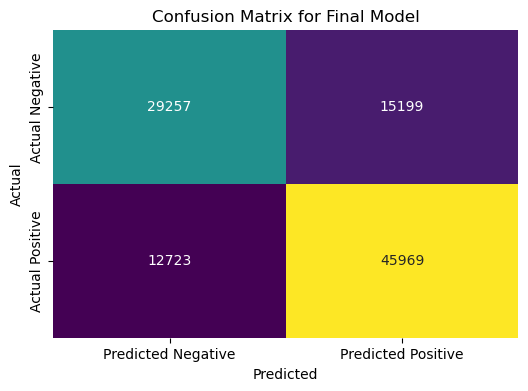

In [68]:
confMatrixP = confusion_matrix(y_test, y_predP)
#calculating the confusion matrix

plt.figure(figsize=(6, 4))
sns.heatmap(confMatrixP, annot=True, fmt="d", cmap = 'viridis', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Final Model")
plt.show()
#plotting the confusion matrix
#setting the format parameter to 'd' so that the values are displayed as integers which helps overall readability
#setting the colormap parameter to 'viridis' as this is a colormap designed to be accessible to those with color vision deficiencies

**Confusion Matrix Analysis**

- True Positives
    - Correctly classified 45,969 positive cases
    - Shows a somewhat strong ability to recognize positive instances
- False Positives
    - Incorrectly classified 15,199 negative cases as positive
    - Indicates room for improvement in reducing false positives, as mentioned previously
- True Negatives
    - Correctly classified 29,257 instances as negative
    - Indicates decent performance in identifying negative instances
- False Negatives
    - Incorrectly classified 12,723 positive cases as negative,
    - Missed some positive instances, which could be addressed for better recall

**ROC Curve**

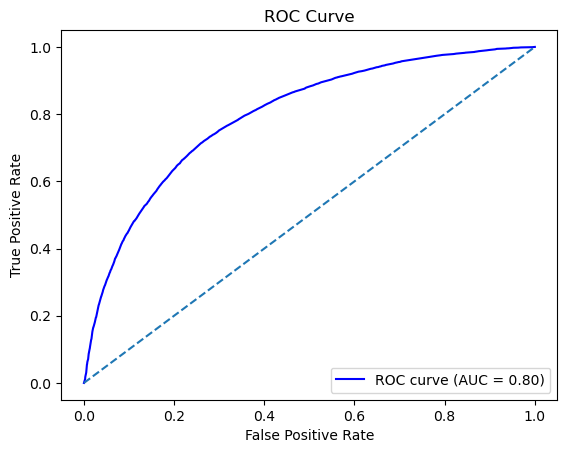

In [72]:
y_prob = bestPipe.predict_proba(X_test)[:, 1]  
#getting the probabilities for the positive class

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
#pr: False Positive Rate at each threshold
#tpr: True Positive Rate (also known as recall or sensitivity) at each threshold
#thresholds: The decision thresholds used to calculate fpr and tpr. By varying this threshold, you can adjust the model's sensitivity and specificity.

roc_auc = auc(fpr, tpr)
#assigning AUC score to 'roc_auc' 

plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


- ROC curves shows how well models distinguish between positive and negative classes at various thresholds
- The AUC score of 0.80 indicates that the model has a decent ability to distinguish between positive and negative classes
- The low False Positive Rate combined with a high True Positive Rate suggests that the model generalizes well, as found by analyzing the confusion matrix

In summary, the model performs decent when it comes to precision and recall, meaning the model is effective in identifying of both positive and negative cases. Although there are a moderate number of false positives and false negatives, the model still demonstrates fair overall accuracy and generalized well to the test data. Additional tuning could definitely help lower these errors, but the model's performance in its current state is decent.

**Summary**
- 

The hotel review data was succesfully analyzed to predict customer sentiment, with a focus on identifying factors that contribute to positive and negative experiences. By applying natural language processing techniques and machine learning models, we were able to achieve insights into customer satisfaction and dissatisfaction.

The logistic regression and decision tree models provided reasonable classification performance, with the logistic regression model achieving around 78% accuracy on unseen data. Key factors contributing to positive experiences included terms such as "gorgeous," "spotless," and "wonderful," highlighting the importance of cleanliness and exceptional service. Conversely, negative terms like "dirty," "dated," and "uncomfortable" emphasized areas needing improvement, particularly in cleanliness and room quality.

While the model performed adequately, further improvements could be achieved by refining feature selection, reducing noise from less relevant terms, and potentially incorporating other data sources. The ROC curve analysis showed moderate model discrimination, suggesting that the model could benefit from further tuning or additional features.

Recommendations:
- Focus on Cleanliness and Service: Positive reviews were highly correlated with cleanliness and staff service, indicating that maintaining and enhancing these aspects could drive higher customer satisfaction.
- Address Negative Experiences Proactively: Common negative terms related to outdated facilities and room comfort suggest that updating rooms and improving comfort could reduce negative reviews.
- Fine Tune Models/Add additional features: Consider further optimizing model hyperparameters and adding more relevant features or refining existing ones, which help capture additional patterns in the data, leading to improved predictive accuracy and robustness.

Overall, this analysis provides actionable insights for hotel management to enhance guest experience and optimize satisfaction through targeted improvements in service quality and facility maintenance.